# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno: **Tomás Abedrapo**

### **Link de repositorio de GitHub:** `https://github.com/t-abedrapo/Laboratorio7_REP.git`

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento son los datos que recibe el modelo a la hora de ajustar los parámetros. Luego de que se entrenó el modelo, se evalua su rendimiento analizando el error de las salidas de los datos de test, que son datos antes no vistos por el modelo.

2. En aprendizaje no supervisado aparecen desafios a la hora de evaluar los modelos, ya que no poseemos una etiqueta en los datos que nos permita conocer el correcto labeling del dato, por lo que se dificulta validar modelos.

3. Una matriz de confusión nos permite visualizar las predicciones correctas e incorrectas hechas por el modelo a partir del labeling original de los datos. Permite facilmente visualizar si el trabajo que desempeña el modelo es correcto, además a partir e la matriz de confusión se pueden generar métricas, ya que tiene información de verdaderos y falsos, positivos y negativos.

4. 

- $ Accuracy =  (TP + FP)/(TP + TN + FP + FN) $:  Nos dice los aciertos totales, tomando en consideracion todas las clases de los datos originales.

- $ Precision = TP/(TP + FP) $: Nos dice los aciertos dentro de los datos predichos como positivos por parte del modelo.

- $ Recall = TP/(TP+FN) $: Nos dice los aciertos dentro de los datos inicialmente etiquetados como positivos.

- $ F1-Score = 2 (Precision * Recall)/(Precision + Recall) $: Es una métrica que penaliza por igual Precision y Recall, mediante la media harmónica de estas métricas.

5. 

* Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  -> **Precision**: minimizar falsos positivos para evitar costos innecesarios.

* Detección de enfermedades altamente contagiosas. -> **Recall**: Nos interesa minimizar falsos negativos, es decir, no diagnosticar a personar con la enfermedad.

* Aprobación de créditos de alto riesgo. -> **Precision**: Nos interesa minimizar falsos positivos, es decir, aprobar créditos de alto riesgo cuando no es conveniente, lo que llevaría a potenciales grandes pérdidas.


* Detección de crímenes. -> **Recall**: Nos interesa minimizar falsos negativos, osea cuando ocurre un crimen y este no es detectado.

6. La calibración se utiliza para ajustar predicciones de probabilidades de modelos de modo que se asemejen a comportamientos teóricos. Así el modelo obtendrá resultados mas confiables y así mejorara la calidad de la evaluación del modelo.



# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/stats_players.csv')

df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:

df['label'] = ~df['National_Position'].isnull().astype(bool) #variable binaria, nos dice si juega por la selección de su pais


n_total = len(df)
n_selec = (df['label'] == True).sum()


print(f'\nJugadores totales:\t{n_total}')

print(f'\nJugadores seleccionados:\t{n_selec} ({100*n_selec/n_total:.2f} %)')

print(f'\nJugadores no seleccionados:\t{(n_total-n_selec)} ({100*(n_total-n_selec)/n_total:.2f} %)')


Jugadores totales:	17588

Jugadores seleccionados:	1075 (6.11 %)

Jugadores no seleccionados:	16513 (93.89 %)


OBS: Existe un considerable desbalance en los datos.

In [4]:
#Tipos de data en las variables

print(f'Data Types: ({df.shape[1]} features)\n')
df.dtypes

Data Types: (40 features)



Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Shot_Power            int64
Finishing             int64
Long_Shots            int64
Curve               

Para las variables que corresponden a habilidades/técnicas propias del deporte, realizaremos MinMaxScaler, para obtener los valores correspondientes en rango 0 a 1, existiendo un máximo y mínimo. Para variables que dependen de la distribución poblaciónal como altura y peso se realizará una estandarización (StandarScaler). Para variables categóricas que aportan información como el pie preferido y work-rate se realizará one hot encoder, para así transformar las variables a numéricas.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#categorical_cols = ['Preffered_Foot' , 'Work_Rate','Club_Position','Nationality']
categorical_cols = ['Preffered_Foot' , 'Work_Rate','Club_Position']
standard_cols = ['Height' , 'Weight' , 'Age']
minmax_cols = ['Weak_foot','Skill_Moves','Ball_Control' ,'Dribbling' ,'Marking','Sliding_Tackle','Standing_Tackle' ,'Aggression' ,
'Reactions','Interceptions','Vision' ,'Composure' ,'Crossing','Short_Pass' ,'Long_Pass' ,'Acceleration' ,'Speed'  ,
'Stamina','Strength' ,'Balance','Agility','Jumping','Heading','Shot_Power','Finishing' ,'Long_Shots','Curve' ,
'Freekick_Accuracy','Penalties','Volleys']


col_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  categorical_cols),
        ('StandardScaler', StandardScaler(),standard_cols),
        ('MinMaxScaler', MinMaxScaler(), minmax_cols)]
    )

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [7]:
#1.
re = 2
test_size = 0.2

y = df['label']
X = df.drop(['label' , 'Name' , 'National_Position'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                     random_state=re)


In [8]:
#2.

pipeline_xgboost = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', XGBClassifier())
])

pipeline_lightgbm = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', LGBMClassifier())
])

In [9]:
#3.
pipeline_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['Preffered_Foot',
                                                   'Work_Rate',
                                                   'Club_Position']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggressi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [10]:
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2528
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['Preffered_Foot',
                                                   'Work_Rate',
                                                   'Club_Position']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', 'Volleys'])])),
                ('clasificador', LGBMClassifier())])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [11]:
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

a_xgboost = accuracy_score(y_test, y_pred_xgboost)
p_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
r_xgboost = recall_score(y_test, y_pred_xgboost, pos_label=1)

a_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
p_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
r_lightgbm = recall_score(y_test, y_pred_lightgbm, pos_label=1)

print('Métricas de evaluación:\n\t(Accuarcy - Precision - Recall)')

print(f'\nXGBOOST:\n\t({a_xgboost:.3f}  -  {p_xgboost:.3f}  -  {r_xgboost:.3f})')

print(f'\nLIGHTGBM:\n\t({a_lightgbm:.3f}  -  {p_lightgbm:.3f}  -  {r_lightgbm:.3f})')

Métricas de evaluación:
	(Accuarcy - Precision - Recall)

XGBOOST:
	(0.938  -  0.467  -  0.130)

LIGHTGBM:
	(0.939  -  0.500  -  0.093)


In [13]:
print('Reportes de clasificación:')

print('\n\nXGBOOST:\n')
print(classification_report(y_test, y_pred_xgboost))


print('\n\nLIGHTGBM:\n')
print(classification_report(y_test, y_pred_lightgbm))

Reportes de clasificación:


XGBOOST:

              precision    recall  f1-score   support

       False       0.95      0.99      0.97      3303
        True       0.47      0.13      0.20       215

    accuracy                           0.94      3518
   macro avg       0.71      0.56      0.59      3518
weighted avg       0.92      0.94      0.92      3518



LIGHTGBM:

              precision    recall  f1-score   support

       False       0.94      0.99      0.97      3303
        True       0.50      0.09      0.16       215

    accuracy                           0.94      3518
   macro avg       0.72      0.54      0.56      3518
weighted avg       0.92      0.94      0.92      3518



2. Precision nos dice los aciertos dentro de las observaciones predecichas positivas. Mientras que el Recall nos dice los aciertos dentro de las observaciones originalmente positivas. Accuarcy nos dice los aciertos totales, dentro de las predicciones tanto positivas como negativas. Para este caso influyen altamente las métricas de Precision y Recall en el análisis debido a la baja cantidad de observaciones positivas frente a las negativas en los datos iniciales.

3. Para ambos modelos obtenemos un Accuarcy superior a 0.9, anque este refleja un rendimiento positivo, es de alta importancia analizar métricas de Recall y Precision, como se menciono anteriormente. Para ambos modelos el Recall es considerablemente bajo, no superando el 0.1. Esto nos dice que nuestro modelo tiene problemas para predecir la clase positiva, siendo esto producto del alto desbalance de los datos. Considerando esta métrica, el modelo XGBoost supera al modelo LightGBM, realizando una predicción mínimamente superior frente a las observaciones positivas.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [16]:
#Agrupar por clase de posición:
y = df['Club_Position'].copy()


y[(y=='ST') | (y=='CF') | (y=='RF') | (y=='LF') | (y=='RS') | (y=='LS') ] = 'ataque'
y[(y=='RW') | (y=='CAM') | (y=='RAM') | (y=='LAM')  | (y=='LW')] = 'central_ataque'
y[(y=='RM') | (y=='CM') | (y=='RCM') | (y=='LCM') | (y=='LM')] = 'central'
y[(y=='RWB') | (y=='CDM') | (y=='RDM') | (y=='LDM') | (y=='LWB')] = 'central_defensa'
y[(y=='RB') | (y=='CB') | (y=='RCB') | (y=='LCB') | (y=='LB')] = 'defensa'
y[(y=='GK')] = 'arquero'

y[(y=='Res') | (y=='Sub') | (y==pd.NA)] = pd.NA

n_nan = y.isna().sum()
n = len(y)

print(f'\nCantidad de observaciones:\t{n}')
print(f'\nCantidad de valores nulos:\t{n_nan}')

print('\nCantidad de datos por clase:')

y.value_counts()


Cantidad de observaciones:	17588

Cantidad de valores nulos:	10639

Cantidad de datos por clase:


Club_Position
defensa            2444
central            1614
ataque              865
central_defensa     741
central_ataque      653
arquero             632
Name: count, dtype: int64

In [17]:
df2 = df.copy()
df2['Club_Position'] = y
df2 = df2.drop(['National_Position'], axis = 1) #alta cantidad de valores nulos
df2 = df2.dropna(axis=0)

print(f'Cantidad de observaciones en dataset:\t{len(df2)}')

Cantidad de observaciones en dataset:	6949


In [18]:
#categorical_cols = ['Preffered_Foot' , 'Work_Rate','Club_Position','Nationality']
categorical_cols = ['Preffered_Foot' , 'Work_Rate']
standard_cols = ['Height' , 'Weight' , 'Age']
minmax_cols = ['Weak_foot','Skill_Moves','Ball_Control' ,'Dribbling' ,'Marking','Sliding_Tackle','Standing_Tackle' ,'Aggression' ,
'Reactions','Interceptions','Vision' ,'Composure' ,'Crossing','Short_Pass' ,'Long_Pass' ,'Acceleration' ,'Speed'  ,
'Stamina','Strength' ,'Balance','Agility','Jumping','Heading','Shot_Power','Finishing' ,'Long_Shots','Curve' ,
'Freekick_Accuracy','Penalties','Volleys']


col_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  categorical_cols),
        ('StandardScaler', StandardScaler(),standard_cols),
        ('MinMaxScaler', MinMaxScaler(), minmax_cols)]
    )

Entrenamiento:

Siguiendo el criterio de la guía, considerando que tenemos aprox. 7000 datos etiquetados según clase, utilizaremos Support Vector Machines y KNeighbors clasificador.

In [19]:
#Definir conjuntos de entrenamiento y test:
re = 2
test_size = 0.3

y = df2['Club_Position']
X = df2.drop(['label' , 'Name' , 'Club_Position','Nationality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                     random_state=re)

In [20]:
#Definir pipelines:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

pipeline_svc = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', SVC(kernel='linear'))
])

n_neighbors = 7

pipeline_knn = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', KNeighborsClassifier(n_neighbors=n_neighbors))
])

In [21]:
#Entrenar:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', 'Volleys'])])),
                ('clasificador', SVC(kernel='linear'))])

In [22]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Weight', 'Age']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', 'Volleys'])])),
                ('clasificador', KNeighborsClassifier(n_neighbors=7))])

In [23]:
#Predecir:
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

In [24]:
#Métricas

print('Reporte de clasificación - SVC:')

print(classification_report(y_test, y_pred_svc))



print('\n\nReporte de clasificación - KNN:')

print(classification_report(y_test, y_pred_knn))

Reporte de clasificación - SVC:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.82      0.84      0.83       260
        central       0.54      0.75      0.63       484
 central_ataque       0.67      0.05      0.09       196
central_defensa       0.55      0.38      0.45       222
        defensa       0.86      0.93      0.90       733

       accuracy                           0.74      2085
      macro avg       0.74      0.66      0.65      2085
   weighted avg       0.74      0.74      0.71      2085



Reporte de clasificación - KNN:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.67      0.72      0.69       260
        central       0.46      0.61      0.52       484
 central_ataque       0.39      0.14      0.21       196
central_defensa       0.28      0.19      0.23       222
        defensa   

Se obtiene un mejor rendimiento en todas las métricas principales para el modelo SVC frente al modelo KNN, obteniendo un Accuarcy de 0.74.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

'et', 'rf', 'dt' son modelos basados en árboles:

1. dt -> Decision Trees: Divide el espacio de features en subconjuntos pequeños mediante un criterio, escogiendo feature que mejor generaliza los datos.

2. rf -> Random Forest: Combina múltiples arboles de decisión con grado de aleatoriedad para así obtener modelo que generalize mejor.

3. et -> Extra Trees: Similar a RF realizando divisiones por nodo de forma aleatoria.

In [25]:
!pip install pycaret
!pip install pycaret[full] -q
!pip install catboost -q
!pip install catboost

from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

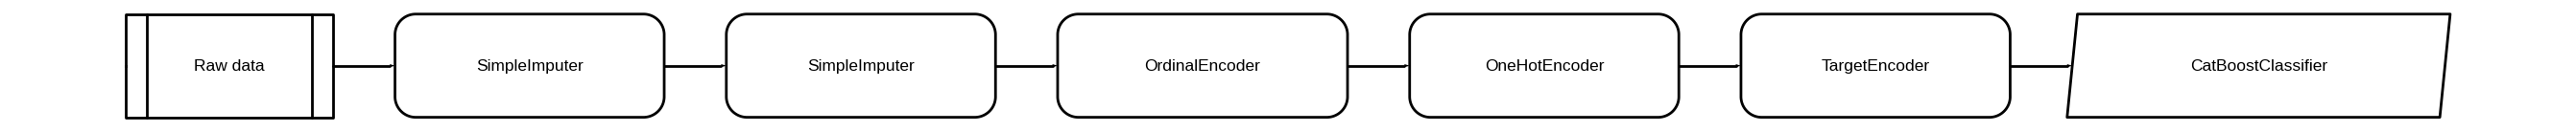

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9570  0.9587  0.4079  0.7949  0.5391  0.5190  0.5510
1       0.9496  0.9538  0.4267  0.6275  0.5079  0.4824  0.4924
2       0.9529  0.9674  0.4133  0.6889  0.5167  0.4935  0.5114
3       0.9529  0.9635  0.4133  0.6889  0.5167  0.4935  0.5114
4       0.9537  0.9514  0.3867  0.7250  0.5043  0.4824  0.5088
5       0.9448  0.9459  0.3733  0.5714  0.4516  0.4239  0.4345
6       0.9586  0.9646  0.5333  0.7143  0.6107  0.5893  0.5963
7       0.9496  0.9513  0.3733  0.6512  0.4746  0.4502  0.4695
8       0.9545  0.9712  0.4933  0.6727  0.5692  0.5458  0.5531
9       0.9529  0.9531  0.4474  0.6800  0.5397  0.5160  0.5286
Mean    0.9526  0.9581  0.4269  0.6815  0.5231  0.4996  0.5157
Std     0.0037  0.0078  0.0492  

In [26]:

X = df.drop(['Name' , 'National_Position'], axis = 1)

clf1 = setup(data=X, target='label', html=False)

models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
best_model = compare_models(include=models)

print('Mejor Modelo:\n',best_model)


evaluate_model(best_model)
tuned_model = tune_model(best_model, optimize='f1')




MATRIZ DE CONFUSIÓN:



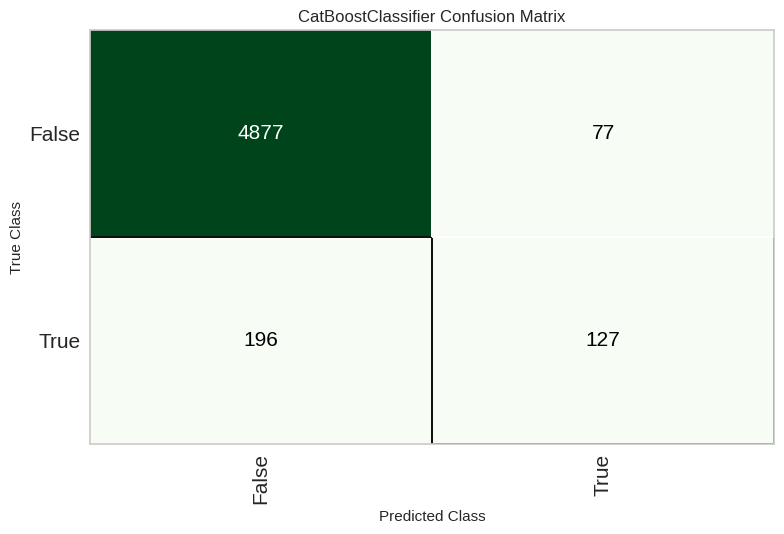

THRESHOLD:



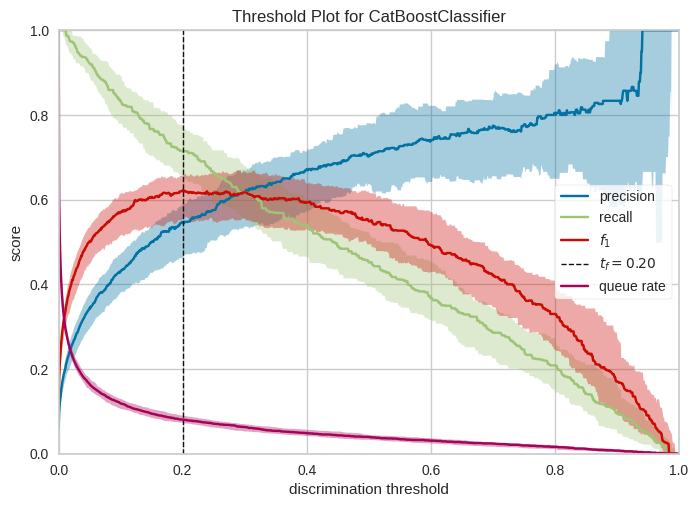

FEATURE:



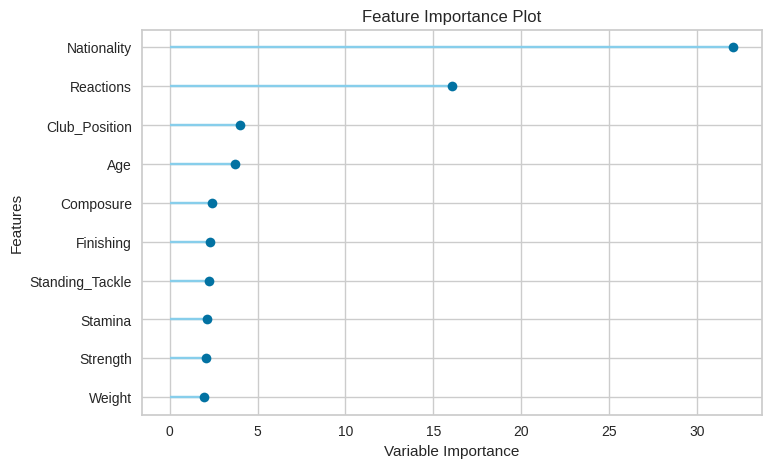

LEARNING:



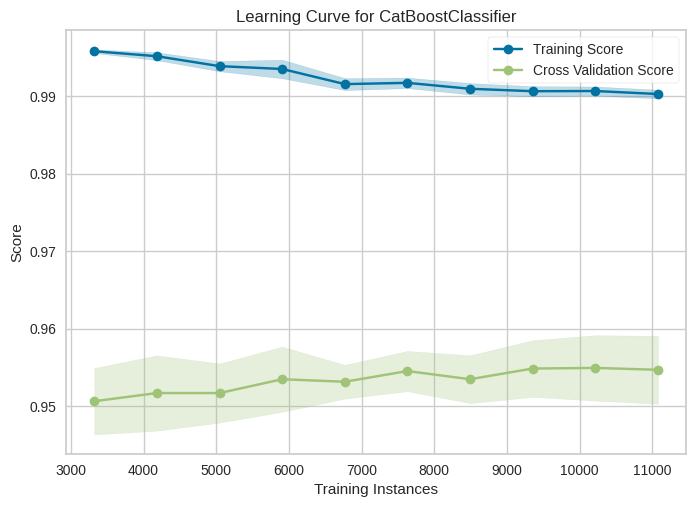

In [27]:
print('MATRIZ DE CONFUSIÓN:\n')
plot_model(tuned_model, plot='confusion_matrix')

print('THRESHOLD:\n')
plot_model(tuned_model, plot='threshold')

print('FEATURE:\n')
plot_model(best_model, plot='feature')


print('LEARNING:\n')
plot_model(best_model, plot='learning')

1. **Matriz de Confusión:**

Hay considerablemente más verdaderos negativos versus verdaderos positivos. Este resultado es lógico debido al desbalance de datos, donde mas del 90% de los jugadores no forman parte de su selección. Los aciertos en los verdaderos positivos (Precision y Recall) mejoró con respecto al modelo inicial.

2. **Threshold:**

El umbral por defecto no es el óptimo evaluando el umbral donde se cruzan las métricas, que es levemente superior.

3. **Feature Importance:**

La variable mas importante para el modelo es la nacionalidad. Esto es totalmente lógico pensando en que, la competitividad de la selección nos indica la facilidad con la que un jugador puede ser seleccionado para esta. Por ejemplo, si un jugador es Brasileño condicionará el mínimo de rendimiento que necesita para ser seleccionado nacional. Por otro lado, respecto a variables futbolisticas, las reacciones tienen una alta importancia, de cierta forma puede ser un buen indicador general de la habilidad del jugador. También afectá la edad, esto tiene sentido ya que un judador cercano al retiro puede tener menos posibilidades de ser seleccionado que un jugador joven.

4. **Learning Curve**

Podemos ver que a medida que aumentan las instancias de entrenamiento, aumenta el puntaje de entropía cruzada. Esto nos interesa ya que este es nuestro indicador que nuestro modelo esta rindiendo de buena manera.



### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [29]:
#columnas categoricas
categoricas = list(df.select_dtypes(include=['object']).columns)
categoricas

['Name',
 'Nationality',
 'National_Position',
 'Club_Position',
 'Preffered_Foot',
 'Work_Rate']

In [33]:
import xgboost

re = 2
test_size = 0.2

X = df.drop(categoricas, axis=1)  
X = X.drop(['label'], axis=1)  
y = df['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=re)

dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'eval_metric': 'logloss',    
    'num_class': 2,
    'max_depth': 7,
    'eta': 0.2
}

model = xgboost.train(params, dtrain, num_boost_round=100)

y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(bool)

In [34]:
print('Classification Report: - XGB')
print(classification_report(y_test, y_pred))

Classification Report: - XGB
              precision    recall  f1-score   support

       False       0.94      0.99      0.97      3295
        True       0.63      0.14      0.23       223

    accuracy                           0.94      3518
   macro avg       0.79      0.57      0.60      3518
weighted avg       0.92      0.94      0.92      3518



In [37]:
importance = model.get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

print('Variables mas importantes en entrenamiento de modelo XGBoost:\n')
importance_df

Variables mas importantes en entrenamiento de modelo XGBoost:



,Feature,Importance
20,Stamina,498.0
10,Aggression,494.0
24,Jumping,452.0
14,Composure,442.0
31,Penalties,416.0
12,Interceptions,414.0
26,Shot_Power,408.0
7,Marking,402.0
11,Reactions,396.0
21,Strength,394.0


In [43]:
for c in importance_df['Feature'].iloc[::-1]:
    print(c)

Skill_Moves
Weak_foot
Ball_Control
Standing_Tackle
Long_Pass
Dribbling
Volleys
Curve
Sliding_Tackle
Short_Pass
Speed
Balance
Finishing
Long_Shots
Freekick_Accuracy
Heading
Height
Vision
Age
Acceleration
Weight
Crossing
Agility
Strength
Reactions
Marking
Shot_Power
Interceptions
Penalties
Composure
Jumping
Aggression
Stamina


In [49]:
from sklearn.metrics import f1_score

X_red = X.copy()

cols = importance_df['Feature'].iloc[::-1] #columnas ordenadas de menor importancia a mayor importancia
n_cols = len(cols)

params = {
    'objective': 'multi:softmax',  
    'eval_metric': 'logloss',    
    'num_class': 2,
    'max_depth': 7,
    'eta': 0.2
}

f1_array = []
n_cols_array = []


for col in cols:

    X_red = X_red.drop([col] , axis=1)
    
    if n_cols>1: 
        n_cols = X_red.shape[1]
        n_cols_array.append(n_cols)
        print(f'Entrenando modelo para {n_cols} columnas')

        X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=test_size, random_state=re)

        dtrain = xgboost.DMatrix(X_train, label=y_train)
        dtest = xgboost.DMatrix(X_test, label=y_test)

        model = xgboost.train(params, dtrain, num_boost_round=100)

        y_pred_proba = model.predict(dtest)
        y_pred = (y_pred_proba > 0.5).astype(bool)

        f1 = f1_score(y_test, y_pred)
        f1_array.append(f1)


Entrenando modelo para 32 columnas
Entrenando modelo para 31 columnas
Entrenando modelo para 30 columnas
Entrenando modelo para 29 columnas
Entrenando modelo para 28 columnas
Entrenando modelo para 27 columnas
Entrenando modelo para 26 columnas
Entrenando modelo para 25 columnas
Entrenando modelo para 24 columnas
Entrenando modelo para 23 columnas
Entrenando modelo para 22 columnas
Entrenando modelo para 21 columnas
Entrenando modelo para 20 columnas
Entrenando modelo para 19 columnas
Entrenando modelo para 18 columnas
Entrenando modelo para 17 columnas
Entrenando modelo para 16 columnas
Entrenando modelo para 15 columnas
Entrenando modelo para 14 columnas
Entrenando modelo para 13 columnas
Entrenando modelo para 12 columnas
Entrenando modelo para 11 columnas
Entrenando modelo para 10 columnas
Entrenando modelo para 9 columnas
Entrenando modelo para 8 columnas
Entrenando modelo para 7 columnas
Entrenando modelo para 6 columnas
Entrenando modelo para 5 columnas
Entrenando modelo para 4 

Mejor F1-Score:	0.21804511278195488
N columnas:	24


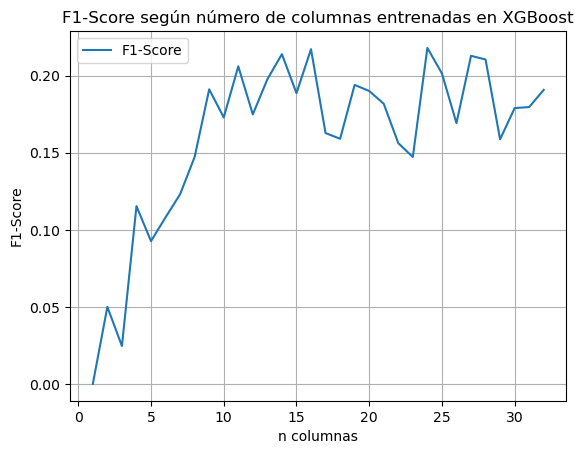

In [52]:
i_max = np.argmax(f1_array)
f1_max = f1_array[i_max]
n_best = n_cols_array[i_max]

print(f'Mejor F1-Score:\t{f1_max}\nN columnas:\t{n_best}')

plt.plot(n_cols_array, f1_array, label='F1-Score')
plt.title('F1-Score según número de columnas entrenadas en XGBoost')
plt.xlabel('n columnas')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

Obtenemos mejor rendimiento para n=24 columnas.

In [64]:
re = 2
test_size = 0.3

cols_train = list(importance_df['Feature'])[:n_best] #entrenar 24 primeras columnas

X = df[cols_train]
y = df['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=re)

dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'eval_metric': 'logloss',    
    'num_class': 2,
    'max_depth': 7,
    'eta': 0.2
}

model = xgboost.train(params, dtrain, num_boost_round=100)

y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(bool)

In [66]:
print(f'Classification Report: - XGB para {n_best} mejores features\n')
print(classification_report(y_test, y_pred))

Classification Report: - XGB para 24 mejores features

              precision    recall  f1-score   support

       False       0.94      1.00      0.97      4938
        True       0.58      0.09      0.16       339

    accuracy                           0.94      5277
   macro avg       0.76      0.54      0.56      5277
weighted avg       0.92      0.94      0.92      5277



El modelo con menos caracteristicas mantiene el accuarcy, pero disminuye el Recall y Precision. Aunque disiminuye el rendimiento, obtenemos la ventaja de utilizar menos features para entrenar el modelo, lo que requiere menor complejidad computacional.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [67]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

re = 2
test_size = 0.2

cols_train = list(importance_df['Feature'])[:n_best] #entrenar 24 primeras columnas

X = df[cols_train]
y = df['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=re)

model = SVC(probability=True, random_state=re)
model.fit(X_train, y_train)

calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated_model.fit(X_train, y_train)

bs_uncalibrated = brier_score_loss(y_test, model.predict_proba(X_test)[:, 1])
bs_calibrated = brier_score_loss(y_test, calibrated_model.predict_proba(X_test)[:, 1])


print("Brier Score sin calibración:", bs_uncalibrated)
print("Brier Score con calibración:", bs_calibrated)

Brier Score sin alibración: 0.05495954528888231
Brier Score con calibración: 0.06167264844532433
